Author: Myllee Sarleth Mosquera Rivas



Course: Artificial Intelligence - Fuzzy Logic

In [1]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\myllee\anaconda3\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control


Definition of Universe Discourse, Linguistic Categories and Fuzzy Membership Function

In [3]:
#Variables
N_residents = np.arange(0, 11, 0.001)
N_childrens = np.arange(0, 6,0.001)
N_room  = np.arange(0, 15,0.001)
N_HA = np.arange(0,31,0.001)
F_HA = np.arange(0,25,0.001)
Temperature = np.arange(0,40,0.001)
I_Niño = np.arange(1,2,0.01)
I_Niña = np.arange(-2,-0.8,0.01)
kWh = np.arange(50,501,0.01)

#fuzzy membership functions - Number of Residents
NR_Low = 1- fuzz.smf(N_residents,1,5)
NR_md = fuzz.gaussmf(N_residents,6,1)
NR_hi = fuzz.smf(N_residents,7,10)

#Fuzzy Membership Functions - Number of Childrens

NC_low = 1 - fuzz.smf (N_childrens, 1,3)
NC_md = fuzz.gaussmf(N_childrens,3,0.3)
NC_hi = fuzz.smf(N_childrens,3,5)

#Fuzzy Membership Functions - Number of Rooms
NRM_low = 1 - fuzz.smf(N_room,1,5)
NRM_md = fuzz.gaussmf(N_room,6,1)
NRM_hi = fuzz.smf(N_room,7,10)

#Fuzzy Membership Functions - Quantity of household appliances
NHA_Low = fuzz.sigmf(N_HA,10,-1)
NHA_Moderate = fuzz.gaussmf(N_HA,15,3)
NHA_High = fuzz.sigmf(N_HA,20,1)

#Fuzzy Membership Functions - Frequency of use of household appliances
FHA_Low = fuzz.sigmf(F_HA,6,-1)
FHA_Moderate = fuzz.gaussmf(F_HA,12,2)
FHA_High = fuzz.sigmf(F_HA,17,1)

#Fuzzy Membership Functions - Outdoor Temperature
T_Cold = fuzz.sigmf(Temperature,10,-1)
T_Moderate = fuzz.gaussmf(Temperature, 20,3)
T_hot = fuzz.sigmf(Temperature,30,1)

#Fuzzy Membership Functions - Intensity of the Niño Phenomenon
INO_Weak = 1 - fuzz.smf(I_Niño,1,1.48)
INO_Moderate = fuzz.gaussmf(I_Niño,1.5,0.05)
INO_High = fuzz.smf(I_Niño,1.6,1.94)

#Fuzzy Membership Functions - Intensity of the Niña Phenomenon
INA_WeakA = fuzz.smf(I_Niña,-1.2,-0.8)
INA_ModerateA = fuzz.gaussmf(I_Niña,-1.25,0.1)
INA_HighA = 1 - fuzz.smf(I_Niña,-2,-1.33)

#Fuzzy Membership Functions - Energy Consumption

kWh_Very_Low = 1 - fuzz.smf(kWh,60,150)
kWh_Low = fuzz.gaussmf(kWh,180,20)
kWh_Moderate = fuzz.gaussmf(kWh,250,20)
kWh_High = fuzz.gaussmf(kWh,350,20)
kWh_Very_High = fuzz.smf(kWh,350,500)

Visualization of Membership Functions

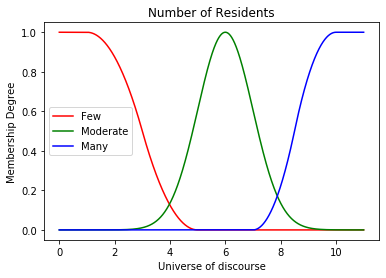

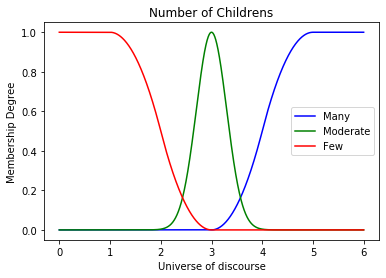

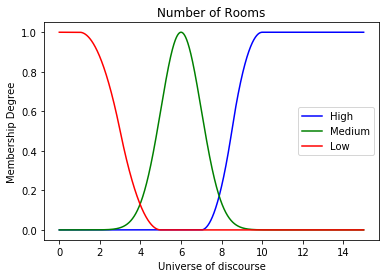

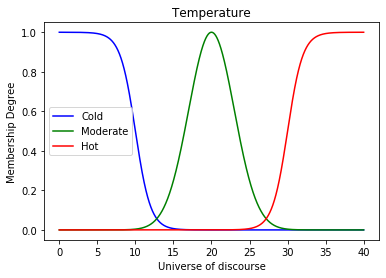

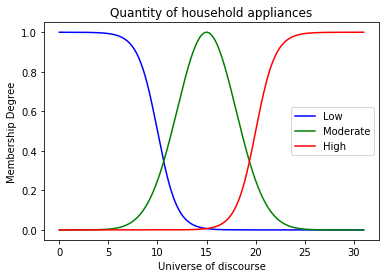

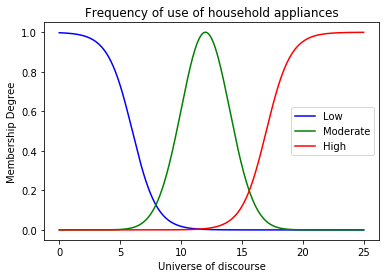

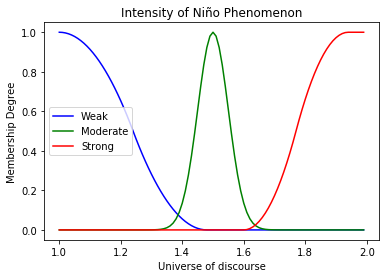

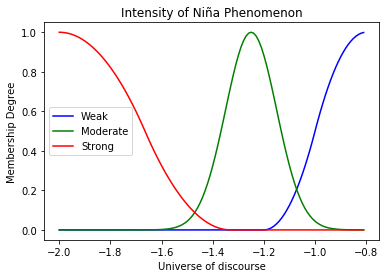

c:\Users\MYLLEE\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


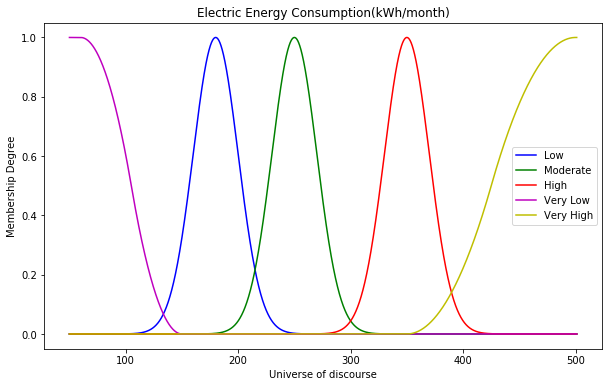

In [4]:
#from os import F_LOCK
#Vi
fig = plt.figure()
fig.clf()
ax0 = fig.subplots(1,1)
ax0.plot(N_residents, NR_Low , 'r', linewidth=1.5, label='Few')
ax0.plot(N_residents, NR_md, 'g', linewidth=1.5, label='Moderate')
ax0.plot(N_residents, NR_hi, 'b', linewidth=1.5, label='Many')
ax0.set_title('Number of Residents')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax0.legend()

fig = plt.figure()
fig.clf()
ax2 = fig.subplots(1,1)
ax2.plot(N_childrens, NC_hi, 'b', linewidth=1.5, label='Many')
ax2.plot(N_childrens, NC_md, 'g', linewidth=1.5, label='Moderate')
ax2.plot(N_childrens, NC_low , 'r', linewidth=1.5, label='Few')
ax2.set_title('Number of Childrens')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax2.legend()

fig = plt.figure()
fig.clf()
ax1 = fig.subplots(1,1)
ax1.plot(N_room, NRM_hi, 'b', linewidth=1.5, label='High')
ax1.plot(N_room, NRM_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(N_room, NRM_low , 'r', linewidth=1.5, label='Low')
ax1.set_title('Number of Rooms')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax1.legend()

fig = plt.figure()
fig.clf()
ax3 = fig.subplots(1,1)
ax3.plot(Temperature, T_Cold, 'b', linewidth=1.5, label='Cold')
ax3.plot(Temperature, T_Moderate, 'g', linewidth=1.5, label='Moderate')
ax3.plot(Temperature, T_hot , 'r', linewidth=1.5, label='Hot')
ax3.set_title('Temperature')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax3.legend()


fig = plt.figure()
fig.clf()
ax4 = fig.subplots(1,1)
ax4.plot(N_HA, NHA_Low, 'b', linewidth=1.5, label='Low')
ax4.plot(N_HA, NHA_Moderate, 'g', linewidth=1.5, label='Moderate')
ax4.plot(N_HA, NHA_High , 'r', linewidth=1.5, label='High')
ax4.set_title('Quantity of household appliances')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax4.legend()


fig = plt.figure()
fig.clf()
ax5 = fig.subplots(1,1)
ax5.plot(F_HA, FHA_Low, 'b', linewidth=1.5, label='Low')
ax5.plot(F_HA, FHA_Moderate, 'g', linewidth=1.5, label='Moderate')
ax5.plot(F_HA, FHA_High , 'r', linewidth=1.5, label='High')
ax5.set_title('Frequency of use of household appliances')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax5.legend()


fig = plt.figure()
fig.clf()
ax6 = fig.subplots(1,1)
ax6.plot(I_Niño, INO_Weak, 'b', linewidth=1.5, label='Weak')
ax6.plot(I_Niño, INO_Moderate, 'g', linewidth=1.5, label='Moderate')
ax6.plot(I_Niño, INO_High , 'r', linewidth=1.5, label='Strong')
ax6.set_title('Intensity of Niño Phenomenon')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax6.legend()

fig = plt.figure()
fig.clf()
ax7 = fig.subplots(1,1)
ax7.plot(I_Niña, INA_WeakA, 'b', linewidth=1.5, label='Weak')
ax7.plot(I_Niña, INA_ModerateA, 'g', linewidth=1.5, label='Moderate')
ax7.plot(I_Niña, INA_HighA, 'r', linewidth=1.5, label='Strong')
ax7.set_title('Intensity of Niña Phenomenon')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax7.legend()



fig = plt.figure(figsize=(10,  6))
fig.clf()
ax8 = fig.subplots(1,1)
ax8.plot(kWh, kWh_Low, 'b', linewidth=1.5, label='Low')
ax8.plot(kWh, kWh_Moderate, 'g', linewidth=1.5, label='Moderate')
ax8.plot(kWh, kWh_High, 'r', linewidth=1.5, label='High')
ax8.plot(kWh, kWh_Very_Low, 'm', linewidth=1.5, label='Very Low')
ax8.plot(kWh, kWh_Very_High, 'y', linewidth=1.5, label='Very High')
ax8.set_title('Electric Energy Consumption(kWh/month)')
plt.xlabel("Universe of discourse")
plt.ylabel("Membership Degree")
ax8.legend()


Definition of Variables as Control Variables

In [5]:
NR = control.Antecedent(N_residents, 'NR')
NC = control.Antecedent(N_childrens, 'NC')
NRM = control.Antecedent(N_room, 'NRM')
NHA = control.Antecedent(N_HA, 'NHA')
FHA = control.Antecedent(F_HA, 'FHA')
T = control.Antecedent(Temperature, 'T')
I_Niño = control.Antecedent(I_Niño, 'INO')
I_Niña = control.Antecedent(I_Niña, 'INA')

#Options for defuzzification method: 'bisector', 'centroid', and 'mom'
defuzzification_method = 'mom'
kWh = control.Consequent(kWh, 'kWh', defuzzify_method=defuzzification_method)

Assignment of membership functions to control variables

In [6]:
NR["Moderate"] = NR_md
NR["Low"] = NR_Low
NR["High"] = NR_hi


NC["Moderate"] = NC_md
NC["Low"] = NC_low
NC["High"] = NC_hi


NRM["Low"] = NRM_low
NRM["Moderate"] = NRM_md
NRM["High"] = NRM_hi

NHA["Low"] = NHA_Low
NHA["Moderate"] = NHA_Moderate
NHA["High"] = NHA_High

FHA["Low"] = FHA_Low
FHA["Moderate"] = FHA_Moderate
FHA["High"] = FHA_High

T["Cold"] = T_Cold
T["Moderate"] =T_Moderate
T["Hot"] = T_hot

I_Niño["Weak"] = INO_Weak
I_Niño["Moderate"] = INO_Moderate
I_Niño["High"] = INO_High

I_Niña["Weak"] = INA_WeakA
I_Niña["Moderate"] = INA_ModerateA
I_Niña["High"] = INA_HighA


kWh["Very_Low"] = kWh_Very_Low
kWh["Low"] = kWh_Low
kWh["Moderate"] = kWh_Moderate
kWh["High"] = kWh_High
kWh["Very High"] = kWh_Very_High

T-Norms and S-Norms

In [19]:
def t_norm1(a, b):
    return np.minimum(a, b)

def t_norm2(a, b):
    return np.multiply(a, b)

def s_norm1(a, b):
    return np.maximum(a, b)

def s_norm2(a,b):
    return np.minimun(a+b,1)


#Change the norms
T_norm = t_norm1
S_norm = s_norm1


RULE BASE

In [20]:
R1 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R2 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R3 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R4 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R5 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R6 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)

R7 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)
R8 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very_Low"], and_func=T_norm , or_func= S_norm)

R9 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R10 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R11 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R12 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R13 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R14 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R15 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R16 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R17 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R18 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R19 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R20 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R21 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R22 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R23 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R24 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niño["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R25 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niño["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R26 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niño["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R27 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R28 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R29 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R30 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R31 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Moderate"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R32 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R33 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R34 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R35 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R36 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R37 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Low"] & NHA["Low"] & FHA["Low"] &(T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R38 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R39 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & NRM["Low"] & NHA["Low"] & FHA["Low"] &(T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R40 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Low"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R41 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Low"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R42 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["High"] & NHA["Moderate"] & FHA["Low"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & (I_Niña["Weak"] | I_Niña["Moderate"] | I_Niña["High"]) & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm) #IMPORTANTE


R43 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"]) & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R44 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"]) & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R45 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R46 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"])  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R47 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"]) & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R48 = control.Rule(antecedent= (NR["Moderate"] & NC["Low"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"] | T["Cold"]) & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R49 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & (I_Niño["Weak"] | I_Niño["Moderate"])& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R50 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R51 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & (I_Niño["Weak"] | I_Niño["Moderate"])& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R52 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE


R53 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"]  & (I_Niña["Weak"] | I_Niña["Moderate"])& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R54 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R55 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"]  & (I_Niña["Weak"] | I_Niña["Moderate"])& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R56 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm) #IMPORTANTE



R57 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"])  & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R58 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R59 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["Low"] & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)


R60 = control.Rule(antecedent= (NR["High"] & NC["Low"] & (NRM["Moderate"] | NRM["High"]) & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"])  & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["Moderate"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R61 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R62 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"])& NHA["Low"] & FHA["Low"] & (T["Cold"] | T["Moderate"] | T["Hot"]) & (I_Niño["Weak"] | I_Niño["Moderate"] | I_Niño["High"]) & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R63 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niño["Weak"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R64 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niño["Weak"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R65 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"] & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R66 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niña["Weak"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R67 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niña["Weak"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R68 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"] & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R69 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niña["Moderate"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R70 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niña["Moderate"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R71 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Moderate"] & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)


R72 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R73 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"]) & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["High"] & ~I_Niño["Moderate"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R74 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Cold"] | T["Moderate"]) & I_Niño["Moderate"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R75 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niño["Moderate"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)


R76 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Cold"] | T["Moderate"]) & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R77 = control.Rule(antecedent= (NR["High"] & NC["Moderate"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)

R78 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Cold"] | T["Moderate"]) & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R79 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)

R80 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Cold"]  | T["Hot"] |T["Moderate"]) & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)


R81 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & T["Cold"] & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R82 = control.Rule(antecedent= (NR["High"] & NC["High"] & (NRM["Moderate"] | NRM["High"]) & NHA["Moderate"] & FHA["Moderate"] & (T["Hot"] | T["Moderate"]) & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R83 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R84 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Moderate"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R85 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)

R86 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R87 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R88 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)

R89 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R90 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R91 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)

R92 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R93 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R94 = control.Rule(antecedent= (NR["Moderate"] & NC["Moderate"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R95 = control.Rule(antecedent= (NR["Moderate"] & NC["High"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R96 = control.Rule(antecedent= (NR["Moderate"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R97 = control.Rule(antecedent= (NR["Moderate"] & NC["High"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R98 = control.Rule(antecedent= (NR["Moderate"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R99 = control.Rule(antecedent= (NR["Moderate"] & NC["High"] & NRM["Moderate"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R100 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)

R101 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R102 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R103 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R104 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R105 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R106 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R107 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R108 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R109 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R110 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R111 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R112 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R113 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R114 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R115 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R116 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Cold"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R117 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Hot"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R118 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["Moderate"] & FHA["High"] & T["Moderate"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R119 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R120 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R121 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R122 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R123 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R124 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R125 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R126 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R127 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Hot"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)

R128 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R129 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)
R130 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["Low"] & T["Moderate"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Low"], and_func=T_norm , or_func= S_norm)


R131 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R132 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niña["Weak"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R133 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niña["Moderate"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R134 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niña["High"] & (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R135 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Hot"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE

R136 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niño["High"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R137 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niño["Moderate"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE
R138 = control.Rule(antecedent= (NR["Low"] & NC["Low"] & NRM["Low"] & NHA["High"] & FHA["High"] & T["Cold"]  & I_Niño["Weak"] & (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm) #IMPORTANTE


R139 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R140= control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Hot"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R141 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Hot"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R142 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["Moderate"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R143 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R144 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R145= control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Moderate"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R146 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Moderate"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R147 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Moderate"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R148 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R149 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R150 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R151 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R152 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R153 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R154 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["High"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Very High"], and_func=T_norm , or_func= S_norm)
R155 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["Low"] & FHA["High"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R156 = control.Rule(antecedent= (NR["High"] & NC["Low"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)

R157 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Hot"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R158 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R159 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)


R160 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Hot"] & I_Niño["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R161 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Moderate"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R162 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Cold"] & I_Niño["High"]& (~I_Niña["Weak"] & ~I_Niña["Moderate"] & ~I_Niña["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)

R163 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Hot"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R164 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Moderate"] & I_Niña["High"]&(~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R165 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Low"] & T["Cold"] & I_Niña["High"]&(~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)


R166 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Hot"] & I_Niña["High"]&(~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["High"], and_func=T_norm , or_func= S_norm)
R167 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Moderate"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)
R168 = control.Rule(antecedent= (NR["High"] & NC["High"] & NRM["High"] & NHA["High"] & FHA["Moderate"] & T["Cold"] & I_Niña["High"]& (~I_Niño["Weak"] & ~I_Niño["Moderate"] & ~I_Niño["High"])), consequent = kWh["Moderate"], and_func=T_norm , or_func= S_norm)


In [21]:
lista_total = []

for i in range(1, 169):  
    nombre_lista = f'R{i}'
    lista_actual = locals()[nombre_lista]  
    lista_total.append(lista_actual)



Mamdani-type inference system

In [22]:
energy_consumption_system = control.ControlSystem(rules = lista_total)
energy_consumption_simulation = control.ControlSystemSimulation(energy_consumption_system)


A case of Study

Your Energy Consumption is 179.9934  kWh/month


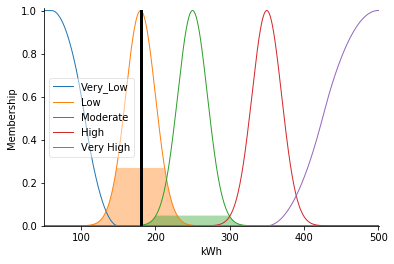

In [23]:
import warnings
warnings.simplefilter("ignore")

#EXAMPLE 

energy_consumption_simulation.input['NR'] =3
energy_consumption_simulation.input['NC'] =1
energy_consumption_simulation.input['NRM'] = 3
energy_consumption_simulation.input['NHA'] = 12
energy_consumption_simulation.input['FHA'] = 14
energy_consumption_simulation.input['T'] = 29

#Only one of the phenomena can be nonzero. These phenomena do not occur simultaneously.
energy_consumption_simulation.input['INO'] = 1.8 
energy_consumption_simulation.input['INA'] = 0

energy_consumption_simulation.compute()

print("Your Energy Consumption is", np.around(energy_consumption_simulation.output['kWh'], 4), " kWh/month")
kWh.view(sim=energy_consumption_simulation, )

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

N_residents = np.arange(0,24,1)
N_childrens = np.arange(1,2,0.1)

x, y = np.meshgrid(N_residents, N_childrens)
z = np.zeros((len(N_residents),len(N_childrens)))
energy_consumption_system = control.ControlSystem(rules = lista_total)


for i in range(len(N_childrens)):
    for j in range(len(N_residents)):
        energy_consumption_simulation = control.ControlSystemSimulation(energy_consumption_system)
        energy_consumption_simulation.input['NC'] = 2
        energy_consumption_simulation.input['INA'] = 100
        energy_consumption_simulation.input['NRM'] = 6
        energy_consumption_simulation.input['T'] = 23
        energy_consumption_simulation.input['NHA'] = 20
        energy_consumption_simulation.input['NR'] = 7
        energy_consumption_simulation.input['FHA'] = x[i,j]
        energy_consumption_simulation.input['INO'] = y[i]
        energy_consumption_simulation.compute()
        z[j, i] = energy_consumption_simulation.output['kWh'][0]

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, np.transpose(z), cmap=plt.cm.cividis)


ax.set_xlabel('Frequency of use of Appliances')
ax.set_ylabel('Intensity of El Niño Phenomenon')
ax.set_zlabel('Energy consumption (kWh/Month)')
plt.show()

KeyboardInterrupt: 